In [2]:
# %matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from numpy import diff

In [5]:
# 目標函數
def func(x): return (x**3) - (2*x) + 100

# 目標函數一階導數:dy/dx
def dfunc(x): return 3*(x**2) - 2

def GD(x_start, df, epochs:int, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
    """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x
    for i in range(epochs):  
        print('epoch {}: x={}, df(x)={}'.format(i + 1, x, df(x)))
        dx = df(x)        
        if dx <= -100 or dx >= 100:
#             index = list(range(i + 1, epochs + 1, 1))
            index = np.array(range(i + 1, epochs + 1, 1))
            print('len(xs) = ' + str(len(xs)))
            xs = np.delete(xs, index) # 沒有指派，則 xs 保持原始大小!
            print('len(xs) = ' + str(len(xs)))
            print('break')
            break
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

In [3]:
np.delete?

import numpy as np
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [2, 3, 6]
print(type(index))
new_a = np.delete(a, index)

print(new_a)

<class 'list'>
[1 2 5 6 8 9]


epoch 1: x=-1, df(x)=1
epoch 2: x=-1.03, df(x)=1.1826999999999996
epoch 3: x=-1.0654810000000001, df(x)=1.4057492840830008
epoch 4: x=-1.10765347852249, df(x)=1.6806886854489171
epoch 5: x=-1.1580741390859577, df(x)=2.0234071348590463
epoch 6: x=-1.218776353131729, df(x)=2.456247396859231
epoch 7: x=-1.2924637750375059, df(x)=3.0113878293526017
epoch 8: x=-1.382805409918084, df(x)=3.736452405096161
epoch 9: x=-1.4948989820709688, df(x)=4.7041688997904565
epoch 10: x=-1.6360240490646825, df(x)=6.029724067353996
epoch 11: x=-1.8169157710853023, df(x)=7.903548757655496
epoch 12: x=-2.054022233814967, df(x)=10.657022011018682
epoch 13: x=-2.373732894145528, df(x)=14.903823558245513
epoch 14: x=-2.8208476008928933, df(x)=21.871543562389576
epoch 15: x=-3.4769939077645806, df(x)=34.26845990389602
epoch 16: x=-4.505047704881461, df(x)=58.88636446977316
epoch 17: x=-6.271638638974656, df(x)=116.0003536536396
len(xs) = 1501
len(xs) = 17
break
[-1.         -1.03       -1.065481   -1.10765348 -1.

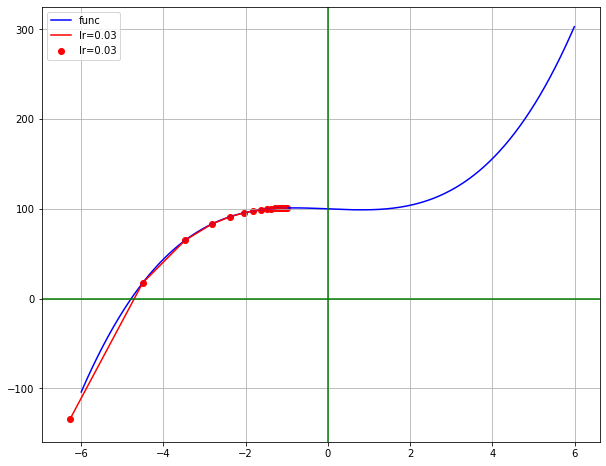

In [7]:
# Main
# 起始權重
x_start = -1 # 5 -1    
# 執行週期數
epochs = 1500
# 學習率   
lr = 0.03 # 0.03, 0.5
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
x = GD(x_start, dfunc, epochs, lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'
plt.figure(figsize = (10, 8))  
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b', label='func')
plt.grid()

y = func(x)
plt.plot(x, y, c=color, label='lr={}'.format(lr))    
plt.scatter(x, y, c=color, label='lr={}'.format(lr))
plt.legend(loc = 'upper left')

plt.axhline(c = 'g')
plt.axvline(c = 'g')
plt.show()